In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import recall_score,confusion_matrix,f1_score,precision_score,accuracy_score
import numpy as np
import seaborn as sns
import warnings
import copy
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
warnings.filterwarnings("ignore")

# 数据预处理
1. 删除浏览量增加值小于dele的数据
2. 将阈值设置为删除后的中位数，高于阈值的标记为1，即流行；低于阈值的标记为0，即不流行
3. 利用MinMaxScaler和StandardScaler进行数据预处理

**将浏览量增加值小于dele的问题删除，同时将阈值设为删除后的中位数，即小于阈值的设为0，大于等于阈值的设为1**

特征说明:
0h 5h 10h 15h分别代表四轮所爬取数据
特征列表:
1. c1 0h浏览量
2. c2 0h回答数
3. c3 0h问题关注者数量
4. c4 0h回答者粉丝数最高值(-1表示没有回答者)
5. c5 0h回答点赞数最高值(-1表示没有回答者)
6. c6 0h时最近5个回答的平均间隔(单位为秒，18000表示没有回答或只有一个回答)

7. c7 5h浏览量-0h浏览量
8. c8 5h回答数-0h回答数
9. c9 5h问题关注者数量-0h问题关注者数量
10. c10 5h回答者粉丝数最高值
11. c11 5h回答点赞数最高值
12. c12 5h时最近5个回答的平均间隔

13. c13 10h浏览量-5h浏览量
14. c14 10h回答数-5h回答数
15. c15 10h问题关注者数量-5h问题关注者数量
16. c16 10h回答者粉丝数最高值
17. c17 10h回答点赞数最高值
18. c18 10h最近5个回答的平均间隔

19. c19 15h浏览量-10h浏览量
20. c20 15h回答数-10h回答数
21. c21 15h问题关注者数量-10h问题关注者数量
22. c22 15h回答者粉丝数最高值
23. c23 15h回答点赞数最高值
24. c2415h最近5个回答的平均间隔

In [2]:
data = pd.read_csv('zhihu.csv')
dele = 10

data = data[data['difference']>=dele]
threshold = (np.median(list(data['difference'])))

data['difference'][data['difference']<threshold]=0
data['difference'][data['difference']>=threshold]=1
features = ['c'+str(i) for i in range(1,25)]

target = ['difference']
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()
scaled_minmax_X = scaler_minmax.fit_transform(data[features])
scaled_std_X = scaler_std.fit_transform(data[features])


X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

print('After deleting some date, the number of remaining data is ',len(data))
print('The threshold will set to ', threshold)
print('The ratio of positive and negative samples: ', list(data['difference']).count(1)/list(data['difference']).count(0))

After deleting some date, the number of remaining data is  9614
The threshold will set to  34.0
The ratio of positive and negative samples:  1.0096153846153846


# 利用不同模型，所有特征做预测

## Random Forest

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [3]:
from sklearn.ensemble import RandomForestClassifier

features = ['c'+str(i) for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)
RF=RandomForestClassifier(n_estimators=200,random_state=1)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7838
acc_score:0.7962
recall_score:0.7357
precision_score0.8385
confusion_matrix:
       0    1
0  1026  171
1   319  888 



## Extra Trees classifier
The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).
This leads to more diversified trees and less splitters to evaluate when training an extremly random forest.

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

features = ['c'+str(i) for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)
ET=ExtraTreesClassifier(n_estimators=50,random_state=20)
ET.fit(X_train,y_train)
y_test_pred = ET.predict(X_test)
print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')


f1_score:0.7538
acc_score:0.7633
recall_score:0.7216
precision_score0.7889
confusion_matrix:
      0    1
0  964  233
1  336  871 



## Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [5]:
from sklearn.linear_model import LogisticRegression

features = ['c'+str(i) for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)
LR=LogisticRegression(random_state=11)
LR.fit(X_train,y_train)
y_test_pred = LR.predict(X_test)
print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7203
acc_score:0.7034
recall_score:0.7606
precision_score0.6841
confusion_matrix:
      0    1
0  773  424
1  289  918 



## Decision Tree Classifier
Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

In [6]:
from sklearn.tree import DecisionTreeClassifier

features = ['c'+str(i) for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_test_pred = DT.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7217
acc_score:0.7184
recall_score:0.7274
precision_score0.7162
confusion_matrix:
      0    1
0  849  348
1  329  878 



## K-Nearest Neighbors
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. However, KNN are usually not good in high dimension problems like this one, and usually need datas to be scaled.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

features = ['c'+str(i) for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)
KNN=KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train,y_train)
y_test_pred = KNN.predict(X_test)
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')
print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))

confusion_matrix:
      0    1
0  898  299
1  483  724 

f1_score:0.6493
acc_score:0.6747
recall_score:0.5998
precision_score0.7077


## MLP

In [8]:
from sklearn.neural_network import MLPClassifier

features = ['c'+str(i) for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test=train_test_split(scaled_std_X,y)
mlp=MLPClassifier(hidden_layer_sizes=(128,128,128), random_state=1)
mlp.fit(X_train,y_train)
y_test_pred = mlp.predict(X_test)
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')
print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))

confusion_matrix:
       0    1
0  1079   94
1   538  693 

f1_score:0.6868
acc_score:0.7371
recall_score:0.5630
precision_score0.8806


# 用不同类型的特征(利用RF模型)
## 只利用前nh时获取的信息(n=0,5,10,15)
### 只利用0h时获取的信息,即特征1-6

In [9]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(1,7)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.6407
acc_score:0.6543
recall_score:0.6139
precision_score0.6700
confusion_matrix:
      0    1
0  832  365
1  466  741 



### 只利用前5h时获取的信息,即特征1-12

In [10]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(1,13)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7062
acc_score:0.7238
recall_score:0.6611
precision_score0.7578
confusion_matrix:
      0    1
0  942  255
1  409  798 



### 只利用前10h时获取的信息,即特征1-18

In [11]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(1,19)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7493
acc_score:0.7662
recall_score:0.6959
precision_score0.8116
confusion_matrix:
       0    1
0  1002  195
1   367  840 



### 利用前15h时获取的信息,即特征1-24

In [12]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(1,25)]
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7807
acc_score:0.7941
recall_score:0.7299
precision_score0.8390
confusion_matrix:
       0    1
0  1028  169
1   326  881 



## 用不同类型的特征
### 仅使用浏览量的增加值(即特征1,7,13,19)

In [13]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(1,25,6)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7494
acc_score:0.7537
recall_score:0.7332
precision_score0.7662
confusion_matrix:
      0    1
0  927  270
1  322  885 



### 仅使用回答数的增加值(即特征2,8,14,20)

In [14]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(2,25,6)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.6227
acc_score:0.6618
recall_score:0.5559
precision_score0.7078
confusion_matrix:
      0    1
0  920  277
1  536  671 



### 仅使用问题关注者数量的增加值(即特征3,9,15,21)

In [15]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(3,25,6)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.6059
acc_score:0.6639
recall_score:0.5145
precision_score0.7367
confusion_matrix:
      0    1
0  975  222
1  586  621 



### 仅使用回答者粉丝数最高值(即特征4,10,16,22)

In [16]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(4,25,6)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.5311
acc_score:0.5732
recall_score:0.4814
precision_score0.5923
confusion_matrix:
      0    1
0  797  400
1  626  581 



### 仅使用回答点赞数最高值(即特征5,11,17,23)

In [17]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(5,25,6)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.6061
acc_score:0.6589
recall_score:0.5228
precision_score0.7211
confusion_matrix:
      0    1
0  953  244
1  576  631 



### 仅使用回答时间间隔(即特征6,12,18,24)

In [18]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i) for i in range(6,25,6)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.5215
acc_score:0.5786
recall_score:0.4573
precision_score0.6066
confusion_matrix:
      0    1
0  839  358
1  655  552 



### 全用

In [19]:
from sklearn.ensemble import RandomForestClassifier
features=['c'+str(i)  for i in range(1,25)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)

RF=RandomForestClassifier(n_estimators=100,random_state=12)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_test_pred)),'\n')

f1_score:0.7807
acc_score:0.7941
recall_score:0.7299
precision_score0.8390
confusion_matrix:
       0    1
0  1028  169
1   326  881 



# 数据特征重要性排序

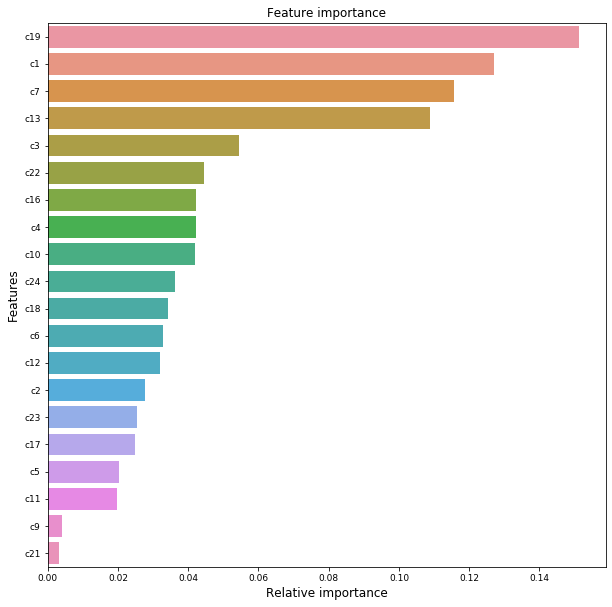

In [20]:
plt.figure(figsize=(10,10))

name = "Random Forest"
classifier = RF
indices = np.argsort(classifier.feature_importances_)[::-1][:20]
g = sns.barplot(y=X_train.columns[indices][:20],x = classifier.feature_importances_[indices][:20] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Feature importance")
plt.show()

# 数据降维

In [21]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
features = ['c'+str(i) for i in range(1,21)]
target = ['difference']
X = data[features]
y= data[target]
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1213)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_pca,y,random_state=1234)
RF=RandomForestClassifier(n_estimators=100,random_state=1213)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.7528
acc_score:0.7525
recall_score:0.7354
precision_score0.7711
confusion_matrix:
 [[903 269]
 [326 906]]


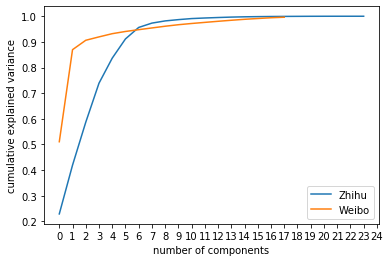

In [22]:
pca = PCA().fit(scaled_std_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_),label='Zhihu')
plt.plot(np.array([0.51062626, 0.86962122, 0.90627918, 0.9194667 , 0.93198412,
       0.94060352, 0.94760291, 0.95436175, 0.96105891, 0.96696928,
       0.9717447 , 0.97606676, 0.98033573, 0.98432015, 0.98810489,
       0.99114987, 0.99412477, 0.99617628     ]),label='Weibo')
plt.xticks(range(0,25,1))
plt.legend()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');